# Classification

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Load the data
data = pd.read_excel(r"C:\Users\Ruslan\Desktop\DataCity - Python\Final Project\classification_excel.xlsx")
data.head()

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocessing

In [3]:
raw_data = data.copy()

In [4]:
raw_data.dtypes

age                int64
work              object
final weight       int64
education         object
education num      int64
marital status    object
occupation        object
relationship      object
race              object
gender            object
capital gained     int64
capital lost       int64
hours per week     int64
native country    object
income            object
dtype: object

In [5]:
raw_data.columns

Index(['age', 'work', 'final weight', 'education', 'education num',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital gained', 'capital lost', 'hours per week', 'native country',
       'income'],
      dtype='object')

In [6]:

raw_data.describe(include='all')

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# Determing the variables of interest
for i in raw_data.columns:
    if data[i].dtypes == 'object':
        print(data[i].value_counts())
        print()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial  

In [8]:
# Drop the unnecessary columns
raw_data = raw_data.drop(["education", "occupation", "native country"], axis=1)
raw_data.describe(include='all')

,age,work,final weight,education num,marital status,relationship,race,gender,capital gained,capital lost,hours per week,income
count,32561.000000,32561,3.256100e+04,32561.000000,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561
unique,NaN,9,NaN,NaN,7,6,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,NaN,Married-civ-spouse,Husband,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22696,NaN,NaN,14976,13193,27816,21790,NaN,NaN,NaN,24720
mean,38.581647,NaN,1.897784e+05,10.080679,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN
std,13.640433,NaN,1.055500e+05,2.572720,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN
min,17.000000,NaN,1.228500e+04,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.783560e+05,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.370510e+05,12.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [9]:
# Dealing with missing values
raw_data.isnull().sum()

age               0
work              0
final weight      0
education num     0
marital status    0
relationship      0
race              0
gender            0
capital gained    0
capital lost      0
hours per week    0
income            0
dtype: int64

In [10]:
raw_data['work'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work, dtype: int64

In [11]:
raw_data[raw_data['work'] == 'HS-grad']

,age,work,final weight,education num,marital status,relationship,race,gender,capital gained,capital lost,hours per week,income


In [12]:
data_no_mv = raw_data.copy()

In [13]:
data_no_mv.describe()

,age,final weight,education num,capital gained,capital lost,hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Dealing with outliers

C:\Users\Ruslan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


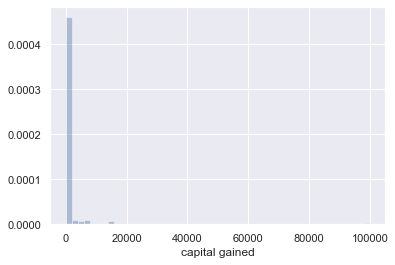

In [14]:
sns.distplot(data_no_mv['capital gained'])

# Change dtypes

In [15]:
data_no_mv.describe(include='all')

,age,work,final weight,education num,marital status,relationship,race,gender,capital gained,capital lost,hours per week,income
count,32561.000000,32561,3.256100e+04,32561.000000,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561
unique,NaN,9,NaN,NaN,7,6,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,NaN,Married-civ-spouse,Husband,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22696,NaN,NaN,14976,13193,27816,21790,NaN,NaN,NaN,24720
mean,38.581647,NaN,1.897784e+05,10.080679,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN
std,13.640433,NaN,1.055500e+05,2.572720,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN
min,17.000000,NaN,1.228500e+04,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.783560e+05,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.370510e+05,12.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_no_mv['income'] = le.fit_transform(data_no_mv['income'])
data_no_mv['income'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int32

In [17]:
data_no_mv['gender'] = le.fit_transform(data_no_mv['gender'])
data_no_mv['gender'].head(10)

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    1
Name: gender, dtype: int32

In [18]:
# Creating dummy variables
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)

In [19]:
data_with_dummies.head()

,age,final weight,education num,gender,capital gained,capital lost,hours per week,income,work_ Local-gov,work_ Never-worked,...,marital status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Define correlated variables

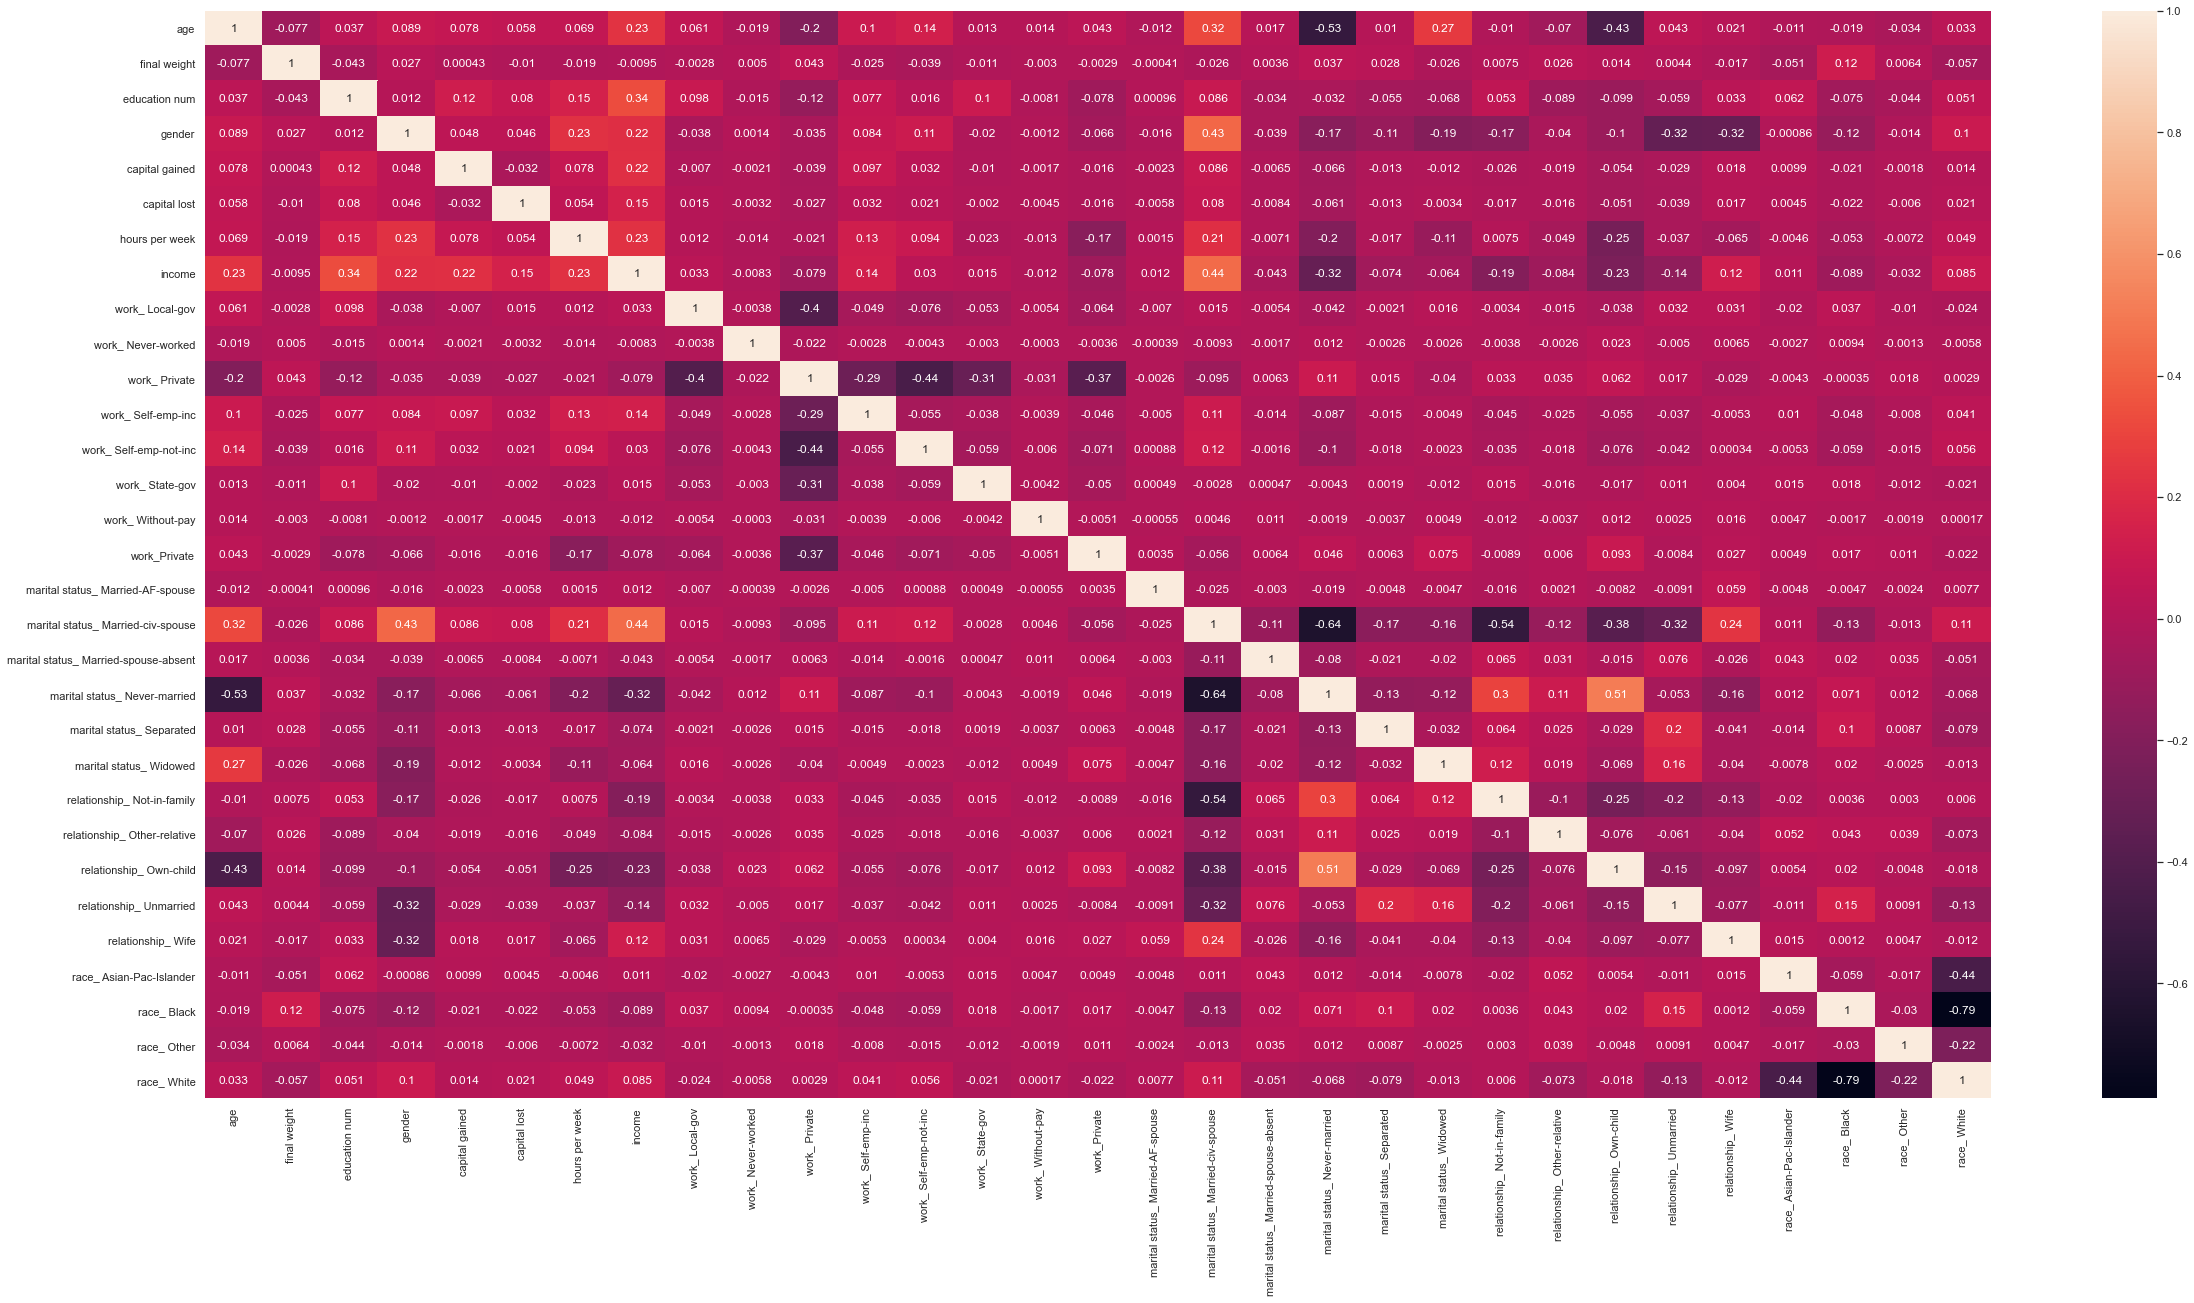

In [20]:
plt.figure(figsize=(40, 20))
sns.heatmap(data_with_dummies.corr(), annot=True)

In [21]:
corr = data_with_dummies.corr()
df_corr = pd.DataFrame(corr['income'])
df_corr.sort_values(by=['income'], ascending=False)

,income
income,1.000000
marital status_ Married-civ-spouse,0.444696
education num,0.335154
age,0.234037
hours per week,0.229689
capital gained,0.223329
gender,0.215980
capital lost,0.150526
work_ Self-emp-inc,0.139467
relationship_ Wife,0.123264


In [22]:
data_with_corr = data_with_dummies[["marital status_ Married-civ-spouse", "education num", "race_ White", "work_ Local-gov", 
                                    "work_ Self-emp-not-inc","work_ Never-worked", "final weight",
                                   "race_ Other", "marital status_ Married-spouse-absent", 
                                    "marital status_ Widowed","marital status_ Separated",
                                   "work_Private", "relationship_ Other-relative", 
                                    "race_ Black", "marital status_ Never-married", "income"]]
data_with_corr

,marital status_ Married-civ-spouse,education num,race_ White,work_ Local-gov,work_ Self-emp-not-inc,work_ Never-worked,final weight,race_ Other,marital status_ Married-spouse-absent,marital status_ Widowed,marital status_ Separated,work_Private,relationship_ Other-relative,race_ Black,marital status_ Never-married,income
0,0,13,1,0,0,0,77516,0,0,0,0,0,0,0,1,0
1,1,13,1,0,1,0,83311,0,0,0,0,0,0,0,0,0
2,0,9,1,0,0,0,215646,0,0,0,0,0,0,0,0,0
3,1,7,0,0,0,0,234721,0,0,0,0,0,0,1,0,0
4,1,13,0,0,0,0,338409,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,12,1,0,0,0,257302,0,0,0,0,0,0,0,0,0
32557,1,9,1,0,0,0,154374,0,0,0,0,0,0,0,0,1
32558,0,9,1,0,0,0,151910,0,0,1,0,0,0,0,0,0
32559,0,9,1,0,0,0,201490,0,0,0,0,0,0,0,1,0


### Multicollinearity

In [23]:
data_with_corr.columns

Index(['marital status_ Married-civ-spouse', 'education num', 'race_ White',
       'work_ Local-gov', 'work_ Self-emp-not-inc', 'work_ Never-worked',
       'final weight', 'race_ Other', 'marital status_ Married-spouse-absent',
       'marital status_ Widowed', 'marital status_ Separated', 'work_Private',
       'relationship_ Other-relative', 'race_ Black',
       'marital status_ Never-married', 'income'],
      dtype='object')

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_with_corr[['marital status_ Married-civ-spouse', 'education num', 'race_ White',
       'work_ Local-gov', 'work_ Self-emp-not-inc', 'work_ Never-worked',
       'final weight', 'race_ Other', 'marital status_ Married-spouse-absent',
       'marital status_ Widowed', 'marital status_ Separated', 'work_Private',
       'relationship_ Other-relative', 'race_ Black',
       'marital status_ Never-married']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]
vif['Features'] = var.columns

In [25]:
vif

,VIF,Features
0,3.940141,marital status_ Married-civ-spouse
1,11.077786,education num
2,11.560115,race_ White
3,1.095230,work_ Local-gov
4,1.115783,work_ Self-emp-not-inc
5,1.000670,work_ Never-worked
6,4.136293,final weight
7,1.096051,race_ Other
8,1.073721,marital status_ Married-spouse-absent
9,1.188277,marital status_ Widowed


In [26]:
data_with_corr.drop(['race_ White'], axis=1, inplace=True)

C:\Users\Ruslan\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
data_with_corr.drop(['education num'], axis=1, inplace=True)

In [28]:
data_with_corr

,marital status_ Married-civ-spouse,work_ Local-gov,work_ Self-emp-not-inc,work_ Never-worked,final weight,race_ Other,marital status_ Married-spouse-absent,marital status_ Widowed,marital status_ Separated,work_Private,relationship_ Other-relative,race_ Black,marital status_ Never-married,income
0,0,0,0,0,77516,0,0,0,0,0,0,0,1,0
1,1,0,1,0,83311,0,0,0,0,0,0,0,0,0
2,0,0,0,0,215646,0,0,0,0,0,0,0,0,0
3,1,0,0,0,234721,0,0,0,0,0,0,1,0,0
4,1,0,0,0,338409,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,257302,0,0,0,0,0,0,0,0,0
32557,1,0,0,0,154374,0,0,0,0,0,0,0,0,1
32558,0,0,0,0,151910,0,0,1,0,0,0,0,0,0
32559,0,0,0,0,201490,0,0,0,0,0,0,0,1,0


In [29]:
data_with_corr.columns

Index(['marital status_ Married-civ-spouse', 'work_ Local-gov',
       'work_ Self-emp-not-inc', 'work_ Never-worked', 'final weight',
       'race_ Other', 'marital status_ Married-spouse-absent',
       'marital status_ Widowed', 'marital status_ Separated', 'work_Private',
       'relationship_ Other-relative', 'race_ Black',
       'marital status_ Never-married', 'income'],
      dtype='object')

In [30]:
del vif

In [31]:
variables = data_with_corr.drop(['income'], axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [32]:
vif

,VIF,Features
0,2.118122,marital status_ Married-civ-spouse
1,1.070908,work_ Local-gov
2,1.103841,work_ Self-emp-not-inc
3,1.000518,work_ Never-worked
4,3.088902,final weight
5,1.012575,race_ Other
6,1.036459,marital status_ Married-spouse-absent
7,1.078490,marital status_ Widowed
8,1.101759,marital status_ Separated
9,1.074152,work_Private


In [33]:
# Rearrange a bit
data_with_corr.columns

Index(['marital status_ Married-civ-spouse', 'work_ Local-gov',
       'work_ Self-emp-not-inc', 'work_ Never-worked', 'final weight',
       'race_ Other', 'marital status_ Married-spouse-absent',
       'marital status_ Widowed', 'marital status_ Separated', 'work_Private',
       'relationship_ Other-relative', 'race_ Black',
       'marital status_ Never-married', 'income'],
      dtype='object')

In [34]:
col = ['income', 'final weight', 'marital status_ Married-civ-spouse', 'work_ Local-gov',
       'work_ Self-emp-not-inc', 'work_ Never-worked', 'race_ Other', 'marital status_ Married-spouse-absent',
       'marital status_ Widowed', 'marital status_ Separated', 'work_Private',
       'relationship_ Other-relative', 'race_ Black',
       'marital status_ Never-married']
data_preprocessed = data_with_corr[col]

In [35]:
data_preprocessed.head()

,income,final weight,marital status_ Married-civ-spouse,work_ Local-gov,work_ Self-emp-not-inc,work_ Never-worked,race_ Other,marital status_ Married-spouse-absent,marital status_ Widowed,marital status_ Separated,work_Private,relationship_ Other-relative,race_ Black,marital status_ Never-married
0,0,77516,0,0,0,0,0,0,0,0,0,0,0,1
1,0,83311,1,0,1,0,0,0,0,0,0,0,0,0
2,0,215646,0,0,0,0,0,0,0,0,0,0,0,0
3,0,234721,1,0,0,0,0,0,0,0,0,0,1,0
4,0,338409,1,0,0,0,0,0,0,0,0,0,1,0


In [36]:
data_preprocessed.shape

(32561, 14)

In [37]:
# Assignning the variables
targets = data_preprocessed['income']
inputs = data_preprocessed.drop(['income'], axis=1)

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33, random_state=365)

In [38]:
inputs

,final weight,marital status_ Married-civ-spouse,work_ Local-gov,work_ Self-emp-not-inc,work_ Never-worked,race_ Other,marital status_ Married-spouse-absent,marital status_ Widowed,marital status_ Separated,work_Private,relationship_ Other-relative,race_ Black,marital status_ Never-married
0,77516,0,0,0,0,0,0,0,0,0,0,0,1
1,83311,1,0,1,0,0,0,0,0,0,0,0,0
2,215646,0,0,0,0,0,0,0,0,0,0,0,0
3,234721,1,0,0,0,0,0,0,0,0,0,1,0
4,338409,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,257302,1,0,0,0,0,0,0,0,0,0,0,0
32557,154374,1,0,0,0,0,0,0,0,0,0,0,0
32558,151910,0,0,0,0,0,0,1,0,0,0,0,0
32559,201490,0,0,0,0,0,0,0,0,0,0,0,1


**---------------------------------------------------------------------------------------------------------------------------**

# KNeighborsClassifiers

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
# Finding best parameters with rmse values
from sklearn.metrics import mean_squared_error
rmse_val = []
for k in range(20):
    k = k+1
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    errors = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(errors)
    print("RMSE value for k = ", k, " is: ", errors)

RMSE value for k =  1  is:  0.569806063768271
RMSE value for k =  2  is:  0.5066099471617057
RMSE value for k =  3  is:  0.5456117342271292
RMSE value for k =  4  is:  0.5062424389906243
RMSE value for k =  5  is:  0.530390400831196
RMSE value for k =  6  is:  0.5085350077283185
RMSE value for k =  7  is:  0.522880538291162
RMSE value for k =  8  is:  0.5048619007264629
RMSE value for k =  9  is:  0.5166139812117679
RMSE value for k =  10  is:  0.4989286866446647
RMSE value for k =  11  is:  0.5091750772173156
RMSE value for k =  12  is:  0.49827545512793603
RMSE value for k =  13  is:  0.5034775770330767
RMSE value for k =  14  is:  0.4960292733447183
RMSE value for k =  15  is:  0.5018113477184936
RMSE value for k =  16  is:  0.4973407789060995
RMSE value for k =  17  is:  0.5006974476817507
RMSE value for k =  18  is:  0.49649806588233786
RMSE value for k =  19  is:  0.4989286866446647
RMSE value for k =  20  is:  0.49443205399816564


In [41]:
# Finding best parameters with RandomizedSearchCV method
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_neighbors": [int(x) for x in np.linspace(start=1, stop=30, num=10)],
    "leaf_size": [int(x) for x in np.linspace(start=1, stop=100, num=10)]
}

model = RandomizedSearchCV(clf, params, cv=5)
model.fit(x_train, y_train)
print(model.best_params_)

{'n_neighbors': 30, 'leaf_size': 45}


In [42]:
# rmse
knn_clf_k = KNeighborsClassifier(n_neighbors=20)
knn_clf_k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [43]:
y_pred_knn_k = knn_clf_k.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm_knn_k = confusion_matrix(y_test, y_pred_knn_k)
cr_knn_k = classification_report(y_test, y_pred_knn_k)
accuracy_knn_k = accuracy_score(y_test, y_pred_knn_k)

In [45]:
# RS
knn_clf_rs = KNeighborsClassifier(n_neighbors=30, leaf_size=45)
knn_clf_rs.fit(x_train, y_train)
y_pred_knn_rs = knn_clf_rs.predict(x_test)
y_pred_knn_rs

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
cm_knn_rs = confusion_matrix(y_test, y_pred_knn_rs)
cr_knn_rs = classification_report(y_test, y_pred_knn_rs)
accuracy_knn_rs = accuracy_score(y_test, y_pred_knn_rs)

In [47]:
print("Accuracy for rmse method (k=20): ", round(accuracy_knn_k,3), "%")
print("Accuracy for RandomizedSearch method (k=26): ", round(accuracy_knn_rs, 3), "%")

Accuracy for rmse method (k=20):  0.756 %
Accuracy for RandomizedSearch method (k=26):  0.758 %


In [48]:
print("Confusion matrix for k=20: \n", cm_knn_k )
print()
print("Confusion matrix for k=30: \n", cm_knn_rs )

Confusion matrix for k=20: 
 [[8076   87]
 [2540   43]]

Confusion matrix for k=30: 
 [[8128   35]
 [2569   14]]


In [49]:
print("Classification report for k=20: \n", cr_knn_k)
print()
print("Classification report for k=30: \n", cr_knn_rs)

Classification report for k=20: 
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      8163
           1       0.33      0.02      0.03      2583

    accuracy                           0.76     10746
   macro avg       0.55      0.50      0.45     10746
weighted avg       0.66      0.76      0.66     10746


Classification report for k=30: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      8163
           1       0.29      0.01      0.01      2583

    accuracy                           0.76     10746
   macro avg       0.52      0.50      0.44     10746
weighted avg       0.65      0.76      0.66     10746



In [50]:
knn_result_df = pd.DataFrame(y_pred_knn_k, columns = ['Predictions'])
knn_result_df['Actual'] = y_test
knn_result_df.head(15)

,Predictions,Actual
0,0,0.0
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,0.0
6,0,0.0
7,0,NaN
8,0,NaN
9,0,NaN


In [51]:
y_test = y_test.reset_index(drop=True)

In [52]:
knn_result_df['Actual'] = y_test
knn_result_df.head(15)

,Predictions,Actual
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,0
9,0,1


In [53]:
knn_result_df['Predictions'].value_counts()

0    10616
1      130
Name: Predictions, dtype: int64

In [54]:
raw_data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [55]:
y_test.value_counts()

0    8163
1    2583
Name: income, dtype: int64

**---------------------------------------------------------------------------------------------------------------------------**

# Support Vector Machine Classification

In [56]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
# randomized Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [1, 10, 100, 1e3, 1e4, 1e5, 1e6], 'gamma': [0.001, 0.0001],
  'kernel': ['linear','poly','rbf']}

svm_search = RandomizedSearchCV(SVC(), parameters, cv=5)
svm_search.fit(x_train,y_train)
print(svm_random.best_params_)

In [ ]:
svc_cls = SVC(C= , kernel= , gamma= )
svc_clf.fit(x_train, y_train)
y_pred_svc = svc_clf.predict(x_test)
y_pred_svc

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cr_svc = classification_report(y_test, y_pred_svc)

In [ ]:
print("Accuracy: ", round(accuracy_svc, 2), "%")
print()
print("Confusion matrix: \n", cm_svc)
print()
print("Classification report: \n", cr_svc)

In [ ]:
svc_result_df = pd.DataFrame(y_pred_svc, columns=['Predictions'])
svc_result_df['Actual'] = y_test
svc_result_df

**---------------------------------------------------------------------------------------------------------------------------**

# Random Forest Classification

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    "max_depth": [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    "max_features": ["auto", "sqrt"]
}
rfc_random = RandomizedSearchCV(rfc, params, n_iter=100, cv=5)
rfc_random.fit(x_train, y_train)
print(rfc.best_params_)

In [ ]:
rfc_clf = RandomForestClassifier(n_estimators= , max_depth= , max_features= )
rfc_clf.fit(x_train, y_train)
y_pred_rfc = rfc_clf.predict(x_test)
y_pred_rfc

In [ ]:
from sklearn import metrics
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cr_rfc = metrics.classification_report(y_test, y_pred_rfc)

In [ ]:
print("Accuracy: ", round(accuracy_rfc, 2), "%")
print()
print("Confusion matrix: \n", cm_rfc)
print()
print("Classification report: \n", cr_rfc)

In [ ]:
rfc_result_df = pd.DataFrame(y_pred_rfc, columns=['Predictions'])
rfc_result_df['Actual'] = y_test
rfc_result_df

# Logistic Regression Model

#### Logistic regression with Statsmodels

In [40]:
import statsmodels.api as sm
sm_log_reg = sm.Logit(targets, inputs)
result_sm_log = sm_log_reg.fit()
result_sm_log.summary()

         Current function value: 0.466296
         Iterations: 35


C:\Users\Ruslan\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32548
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.1553
Time:                        02:12:24   Log-Likelihood:                -15183.
converged:                      False   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
final weight                          -3.255e-06   1.19e-07    -27.329      0.000   -3.49e-06   -3.02e-06
marital status_ Married-civ-spouse        0.5357      0.028     19.314      0.000       0.481       0.590
work_ Local-gov                          -0.0669      0.055     -1.219      0.223      -0.174       0.041
work_ Self-emp-not-inc                   -0.4835      0.049     -9.812      0.000      -0.580      -0.387
work_ Never-worked                      -21.8585   4.91e+04     -0.000      1.000   -9.63e+04    9.62e+04
race_ Other                              -1.2331      0.222     -5.556      0.000      -1.668      -0.798
marital status_ Married-spouse-absent    -1.5975      0.182     -8.783      0.000      -1.954      -1.241
marital status_ Widowed                  -1.5674      0.116    -13.490      0.000      -1.795      -1.340
marital status_ Separated                -1.8028      0.130    -13.859      0.000      -2.058      -1.548
work_Private                             -1.1340      0.083    -13.719      0.000      -1.296      -0.972
relationship_ Other-relative             -1.5254      0.175     -8.696      0.000      -1.869      -1.182
race_ Black                              -0.6320      0.061    -10.387      0.000      -0.751      -0.513
marital status_ Never-married            -2.2658      0.050    -44.971      0.000      -2.365      -2.167
=========================================================================================================
"""

In [45]:
# Confusion matrix
cm_sm_log = pd.DataFrame(result_sm_log.pred_table(), columns = ["Predicted 0", "Predicted 1"])
cm_sm_log = cm_sm_log.rename(index={0: 'Actual 1', 1: "Actual2"})
cm_sm_log

,Predicted 0,Predicted 1
Actual 1,22067.0,2653.0
Actual2,5397.0,2444.0


In [47]:
# Accuracy score
cm = np.array(cm_sm_log)
accuracy_cm_log = (cm[0,0]+cm[1,1]) / np.sum(cm)
print("Accuracy:", round(accuracy_cm_log, 2), "%")

Accuracy: 0.75 %


#### Logistic Regression with Sklearn

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [50]:
# Intercept
log_reg.intercept_

array([-4.57361353e-11])

In [52]:
log_reg.coef_

array([[-5.03206857e-06,  2.53599234e-11, -1.18777881e-12,
        -2.23919104e-12, -2.47579661e-14, -9.69604829e-13,
        -1.62930544e-12, -3.90236342e-12, -4.07049550e-12,
        -6.57600409e-12, -4.32106414e-12, -8.31177855e-12,
        -4.55612846e-11]])

In [54]:
y_pred_log = log_reg.predict(x_test)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
def confusion_matrix(data, actual_val, model):
    y_pred = model.predict(data)
    bins=[0, 0.5, 1]
    cm = np.histogram2d(y_pred, actual_val, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
    return cm, accuracy

In [78]:
cm_log_reg = confusion_matrix(x_test, y_test, log_reg)
cm_log_reg

(array([[8163., 2583.],
        [   0.,    0.]]),
 0.7596314907872697)

In [80]:
cm_1 = np.array(cm_log_reg)
cm_log_reg_df = pd.DataFrame(cm)
cm_log_reg_df.columns = ["Prediction 0", "Prediction 1"]
cm_log_reg_df = cm_log_reg_df.rename(index = {0: "Actual 0", 1: "Actual 1"})
cm_log_reg_df

,Prediction 0,Prediction 1
Actual 0,22067.0,2653.0
Actual 1,5397.0,2444.0


In [81]:
cm_ac = np.array(cm_log_reg_df)
accuracy_log_reg = (cm_ac[0,0]+cm_ac[1,1] / np.sum(cm_ac))
accuracy_log_reg

22067.075059119805

In [86]:
from sklearn.metrics import classification_report
cr_log_reg = classification_report(y_test, y_pred_log)
print(cr_log_reg)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8163
           1       0.00      0.00      0.00      2583

    accuracy                           0.76     10746
   macro avg       0.38      0.50      0.43     10746
weighted avg       0.58      0.76      0.66     10746

